In [1]:
import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
print(os.getcwd())
#os.chdir('archive/asl_alphabet_train/asl_alphabet_train')
os.listdir()
train_dir = '../jagannathan/ASL_DATA_4K/archive/asl_alphabet_train/asl_alphabet_train/'
test_dir = '../jagannathan/ASL_DATA_4K/archive/asl_alphabet_test/asl_alphabet_test/'

/home/jupyter


unique_labels =  ['S', 'Y', 'B', 'J', 'G', 'A', 'Q', 'E', 'V', 'L', 'space', 'F', 'R', 'del', 'C', 'nothing', 'U', 'K', 'T', 'P', 'Z', 'N', 'W', 'I', 'M', 'H', 'D', 'O', 'X']


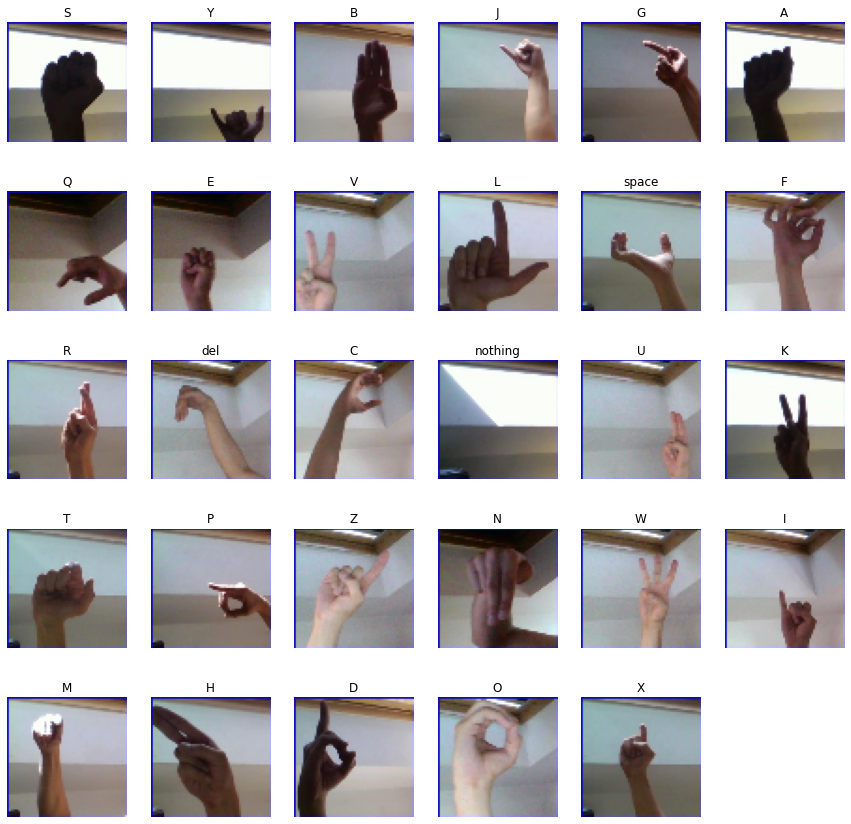

In [3]:
def load_unique():
    size_img = 64,64 
    images_for_plot = []
    labels_for_plot = []
    for folder in os.listdir(train_dir):
        for file in os.listdir(train_dir + '/' + folder):
            filepath = train_dir + '/' + folder + '/' + file
            image = cv2.imread(filepath)
            final_img = cv2.resize(image, size_img)
            final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
            images_for_plot.append(final_img)
            labels_for_plot.append(folder)
            break
    return images_for_plot, labels_for_plot

images_for_plot, labels_for_plot = load_unique()
print("unique_labels = ", labels_for_plot)

fig = plt.figure(figsize = (15,15))
def plot_images(fig, image, label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    plt.title(label)
    return

image_index = 0
row = 5
col = 6
for i in range(1,(row*col)):
    plot_images(fig, images_for_plot[image_index], labels_for_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

In [4]:
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25,'space':26,'del':27,'nothing':28}

def load_data():
    """
    Loads data and preprocess. Returns train and test data along with labels.
    """
    images = []
    labels = []
    size = 64,64
    print("LOADING DATA FROM : ",end = "")
    for folder in os.listdir(train_dir):
        print(folder, end = ' | ')
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(labels_dict[folder])
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    labels = keras.utils.to_categorical(labels)
    
    X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.05)
    
    print()
    print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return X_train, X_test, Y_train, Y_test

In [5]:
X_train, X_test, Y_train, Y_test = load_data()

LOADING DATA FROM : S | Y | B | J | G | A | Q | E | V | L | space | F | R | del | C | nothing | U | K | T | P | Z | N | W | I | M | H | D | O | X | 
Loaded 82650 images for training, Train data shape = (82650, 64, 64, 3)
Loaded 4350 images for testing Test data shape = (4350, 64, 64, 3)


In [6]:
from tensorflow.keras.applications import vgg16

# Init the VGG model 
vgg_conv = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

2021-11-24 17:53:05.228197: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2199995000 Hz
2021-11-24 17:53:05.229295: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55731406a480 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-11-24 17:53:05.229319: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-11-24 17:53:05.229953: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f8ae914c950> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8ae95c6750> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8ae9581550> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f8ae952fd10> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8ae9550090> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8ae952f810> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f8ae955a850> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8ae955ffd0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8ae9564dd0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8ae9569990> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f8ae9292e10> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

In [8]:
# Create the model
model = Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(29, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 29)                29725     
Total params: 16,842,589
Trainable params: 2,127,901
Non-trainable params: 14,714,688
_________________________________________________________________


In [9]:
# Load the normalized images
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10

# Data generator for training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data generator for validation data
validation_generator = validation_datagen.flow_from_directory(
        test_dir,
        target_size=(64, 64),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 87000 images belonging to 29 classes.
Found 0 images belonging to 0 classes.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 29)                29725     
Total params: 16,842,589
Trainable params: 2,127,901
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
from keras import optimizers
# Configure the model for training
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Train the model
#history = model.fit(
#      train_generator,
#      steps_per_epoch=
#         train_generator.samples/train_generator.batch_size,
#      epochs=4,
#      validation_data=validation_generator, 
#      validation_steps=
#         validation_generator.samples/validation_generator.batch_size)

model_hist = model.fit(X_train, Y_train, batch_size = 64, epochs = 5, validation_split = 0.1)

Epoch 1/5
1163/1163 [==============================] - 1039s 893ms/step - loss: 1.3418 - acc: 0.6656 - val_loss: 0.5208 - val_acc: 0.9016
Epoch 2/5
1163/1163 [==============================] - 1040s 894ms/step - loss: 0.4126 - acc: 0.9011 - val_loss: 0.2332 - val_acc: 0.9569
Epoch 3/5
1163/1163 [==============================] - 1042s 896ms/step - loss: 0.2223 - acc: 0.9472 - val_loss: 0.1376 - val_acc: 0.9736
Epoch 4/5
1163/1163 [==============================] - 1041s 895ms/step - loss: 0.1405 - acc: 0.9675 - val_loss: 0.0836 - val_acc: 0.9856
Epoch 5/5
1163/1163 [==============================] - 1041s 895ms/step - loss: 0.0966 - acc: 0.9780 - val_loss: 0.0575 - val_acc: 0.9900


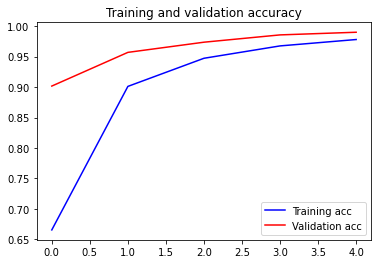

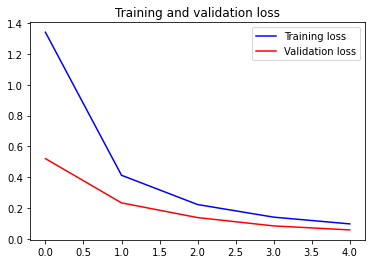

In [12]:
# Utility function for plotting of the model results
def visualize_results(history):
    # Plot the accuracy and loss curves
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()


# Run the function to illustrate accuracy and loss
visualize_results(model_hist)

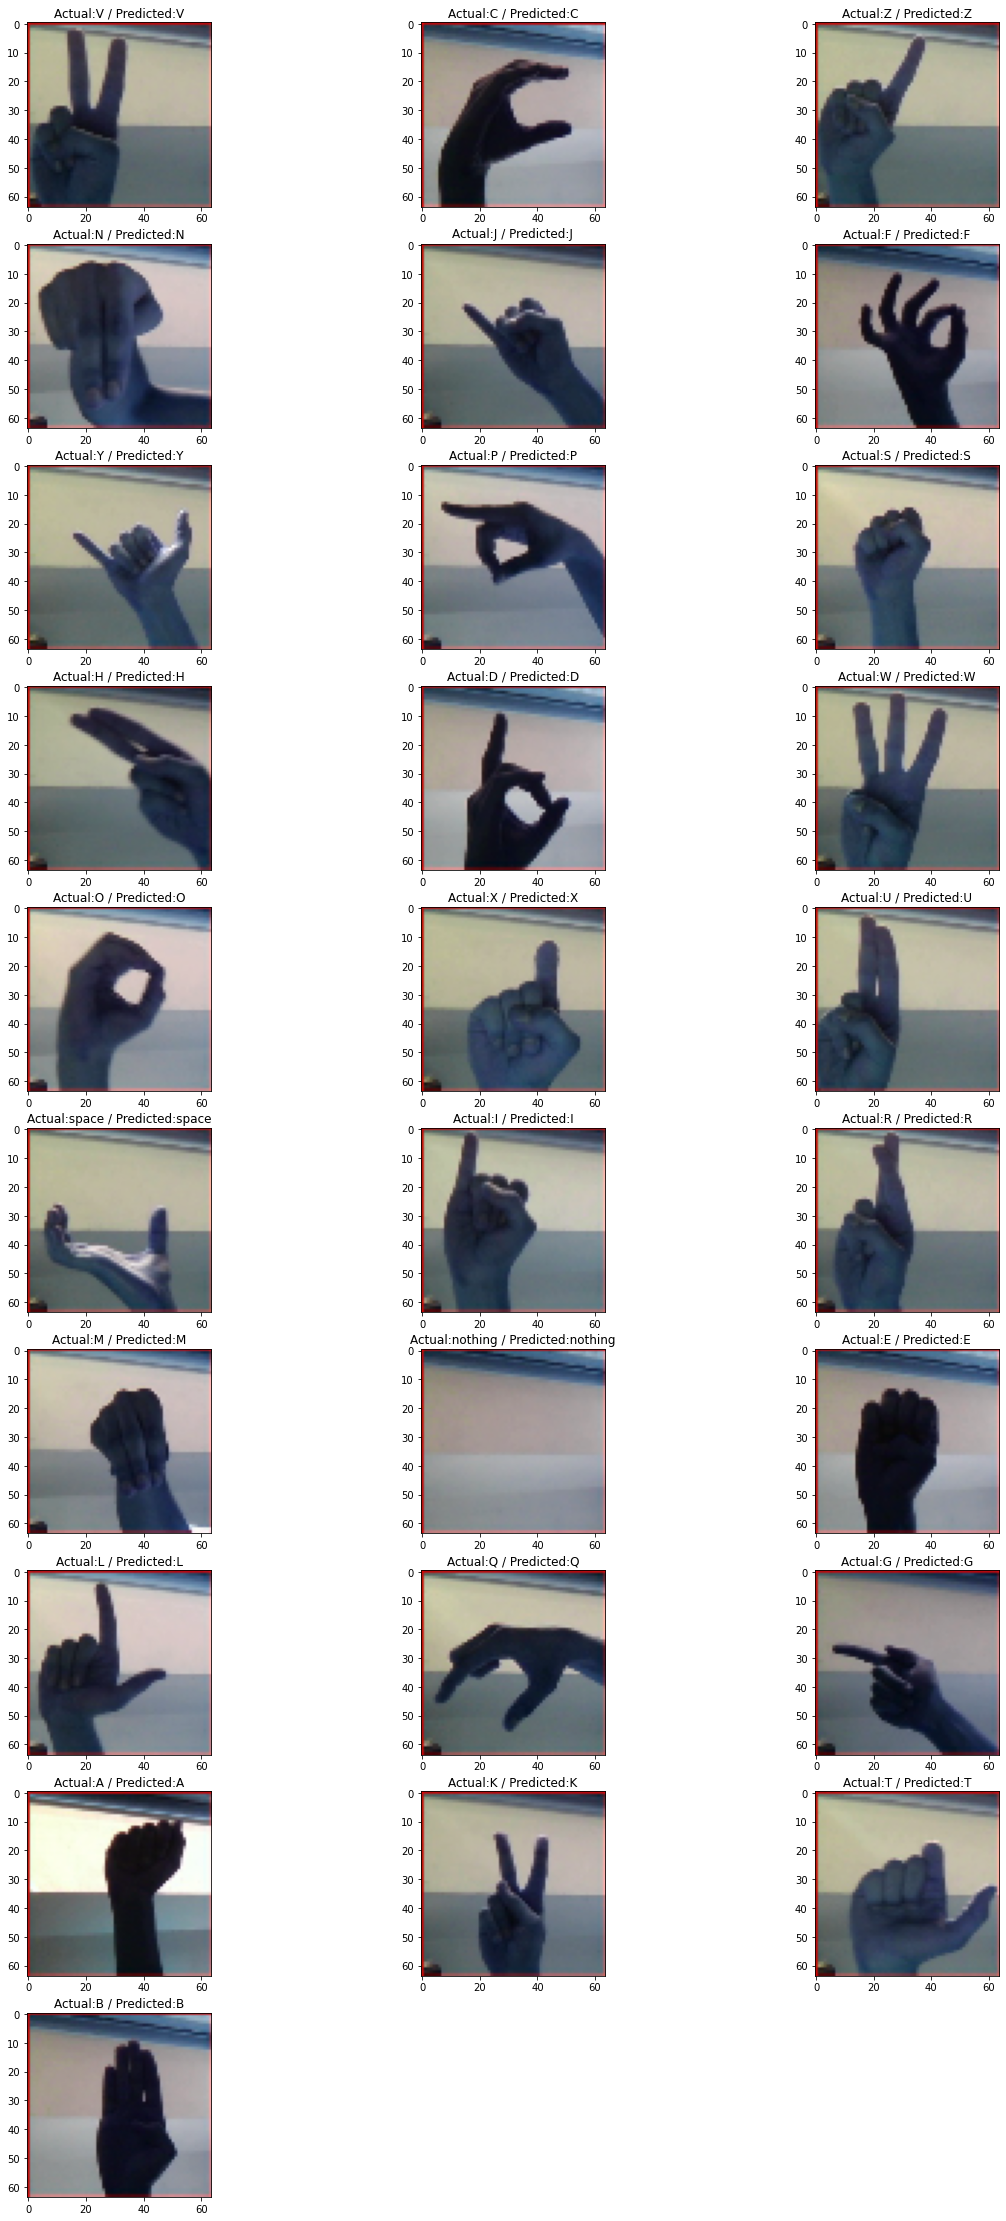

In [13]:
from PIL import Image

labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25,'space':26,'del':27,'nothing':28}

inv_labels_dict = {v: k for k, v in labels_dict.items()}

size_img = 64,64            
plt.figure(figsize=(20,40))
for i in enumerate(os.listdir(test_dir)):
    image = cv2.imread(test_dir+'/'+i[1])
    image = np.asarray(image)
    image = image/255
    image = cv2.resize(image, size_img)
    
    plt.subplot(10,3,i[0]+1)
    plt.imshow(image)
    pred = np.argmax(model.predict(image.reshape(-1,64,64,3)))
    #print(pred, i[1])
    prediction = -1
    for j in range(29):
        if inv_labels_dict[pred] == inv_labels_dict[j]:
            prediction=inv_labels_dict[pred]
        else:
            continue       
    plt.title('Actual:{0} / Predicted:{1}'.format(i[1].split('_')[0],prediction))
    
plt.show()    

In [15]:
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
#yhat_probs = yhat_probs[:, 0]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


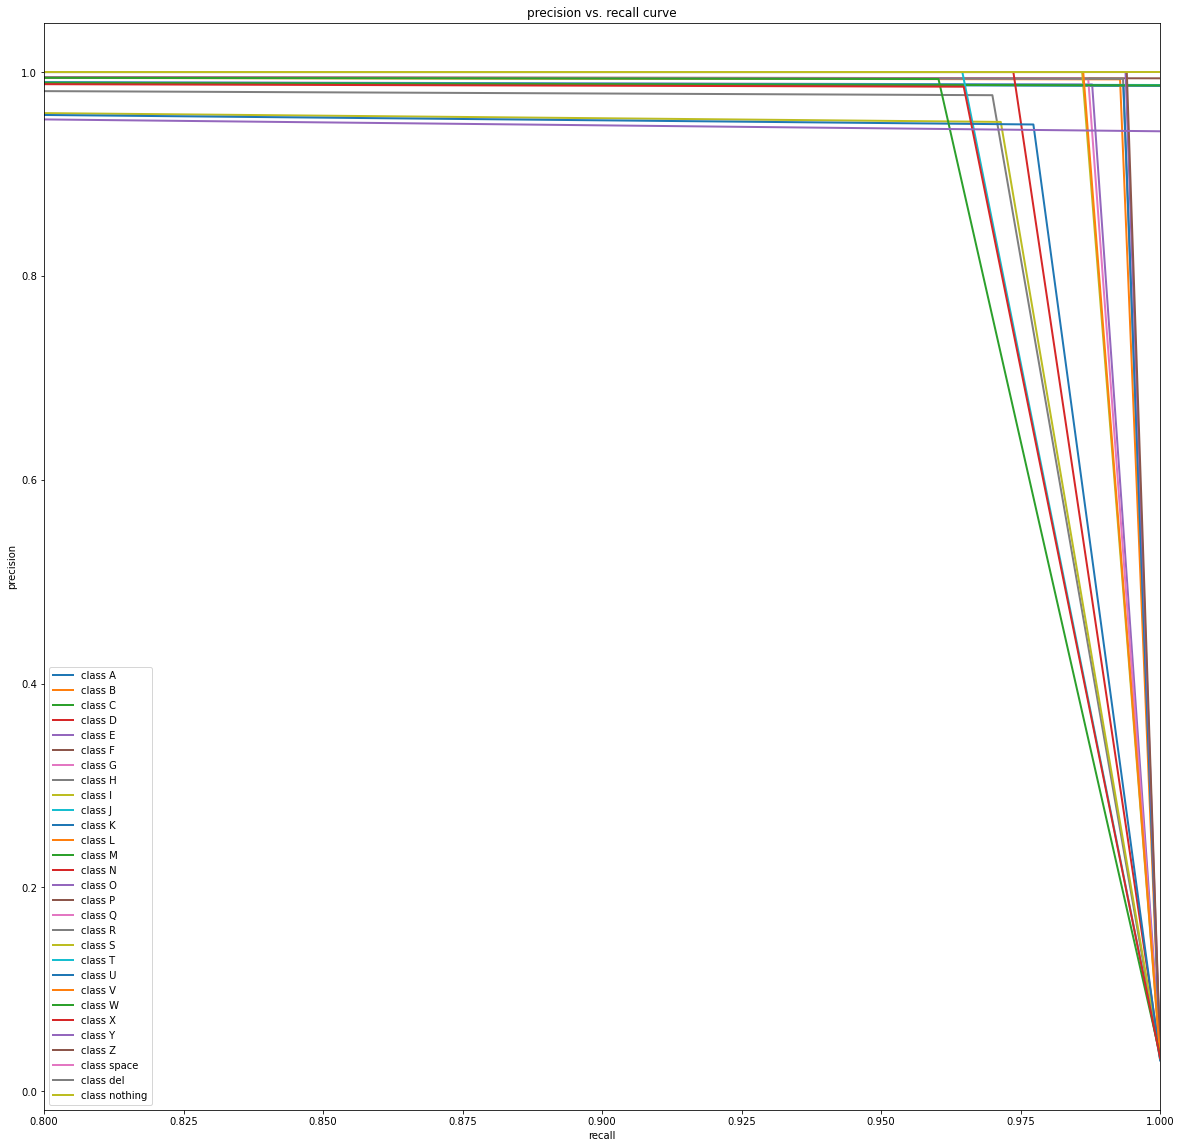

In [16]:
from sklearn.metrics import precision_recall_curve, roc_curve
precision = dict()
recall = dict()
plt.figure(figsize=(20, 20))
for clsi in range(29):
    precision[clsi], recall[clsi], _ = precision_recall_curve(Y_test[:,clsi], yhat_classes == clsi)
    plt.plot(recall[clsi], precision[clsi], lw=2, label='class {}'.format(inv_labels_dict[clsi]))

plt.xlim(0.8, 1.0) 
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

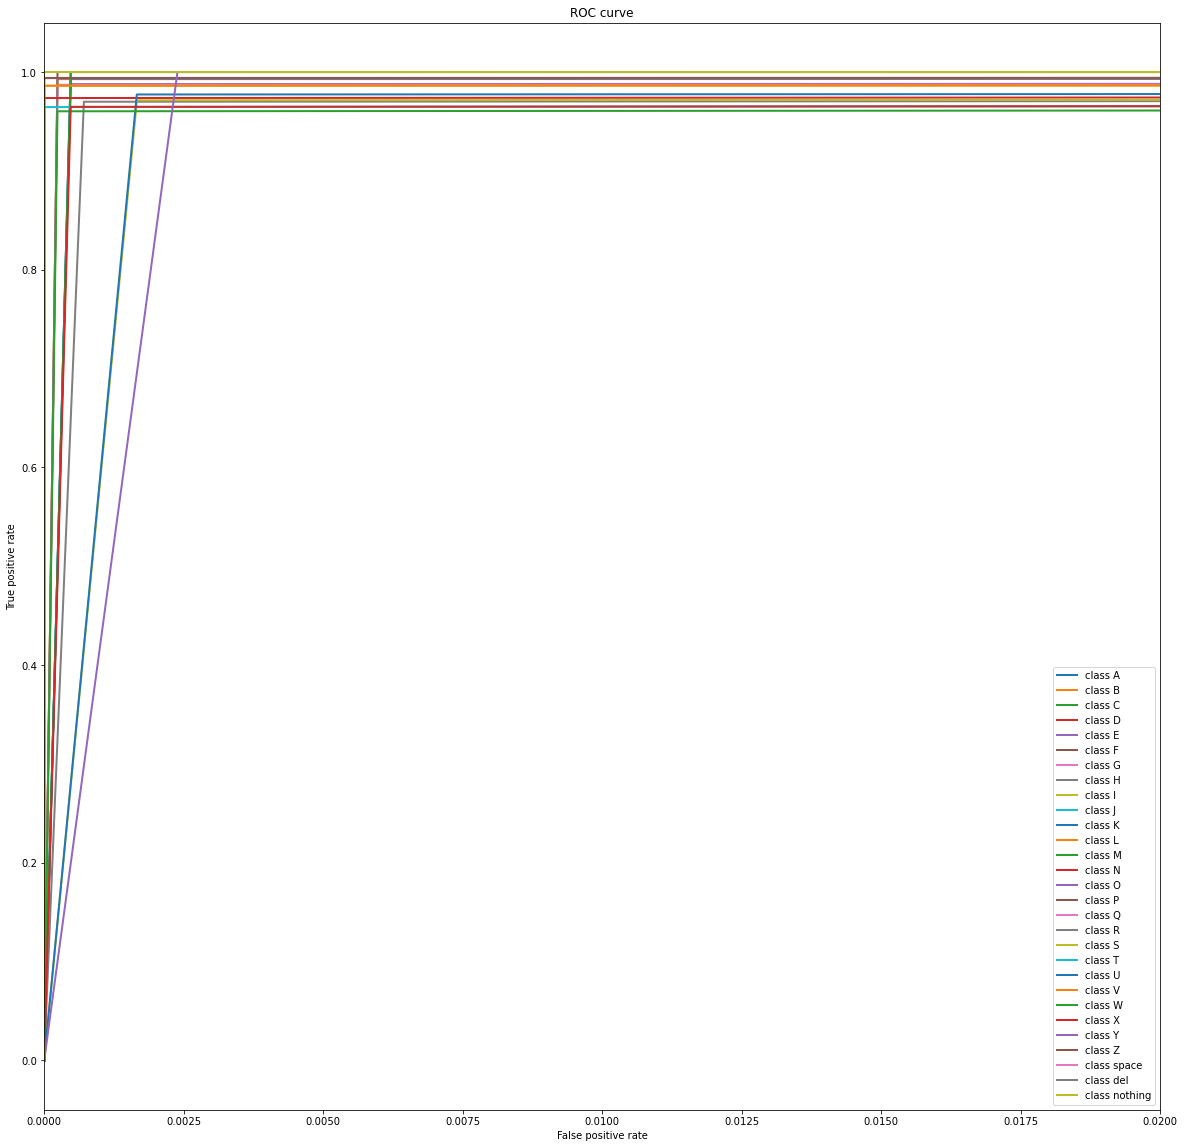

In [17]:
fpr = dict()
tpr = dict()
plt.figure(figsize=(20,20))
for clsi in range(29):
    fpr[clsi], tpr[clsi], _ = roc_curve(Y_test[:,clsi], yhat_classes == clsi)
    plt.plot(fpr[clsi], tpr[clsi], lw=2, label='class {}'.format(inv_labels_dict[clsi]))
plt.xlim(0.0, 0.02)  
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc="lower right")
plt.title("ROC curves")
plt.show()

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

for clsi in range(29):
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(Y_test[:,clsi], yhat_classes == clsi)

    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(Y_test[:,clsi], yhat_classes == clsi, average='weighted')
    print('Label: %s' % inv_labels_dict[clsi],'Accuracy: %f' % accuracy, 'F1 score: %f' % f1)


Label: A Accuracy: 0.999540 F1 score: 0.999542
Label: B Accuracy: 0.999540 F1 score: 0.999540
Label: C Accuracy: 1.000000 F1 score: 1.000000
Label: D Accuracy: 1.000000 F1 score: 1.000000
Label: E Accuracy: 0.999080 F1 score: 0.999080
Label: F Accuracy: 0.999770 F1 score: 0.999770
Label: G Accuracy: 0.999310 F1 score: 0.999309
Label: H Accuracy: 0.999540 F1 score: 0.999540
Label: I Accuracy: 0.999540 F1 score: 0.999539
Label: J Accuracy: 0.999540 F1 score: 0.999542
Label: K Accuracy: 0.999310 F1 score: 0.999311
Label: L Accuracy: 1.000000 F1 score: 1.000000
Label: M Accuracy: 0.999540 F1 score: 0.999542
Label: N Accuracy: 0.999080 F1 score: 0.999075
Label: O Accuracy: 0.999770 F1 score: 0.999770
Label: P Accuracy: 0.999770 F1 score: 0.999770
Label: Q Accuracy: 1.000000 F1 score: 1.000000
Label: R Accuracy: 0.998391 F1 score: 0.998388
Label: S Accuracy: 0.997471 F1 score: 0.997484
Label: T Accuracy: 0.998851 F1 score: 0.998841
Label: U Accuracy: 0.997701 F1 score: 0.997718
Label: V Accu

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), yhat_classes)
#print(np.argmax(Y_test, axis=1).shape, yhat_classes.shape)
#print(np.argmax(Y_test, axis=1)[:5], yhat_classes[:5])
cm.shape

(29, 29)

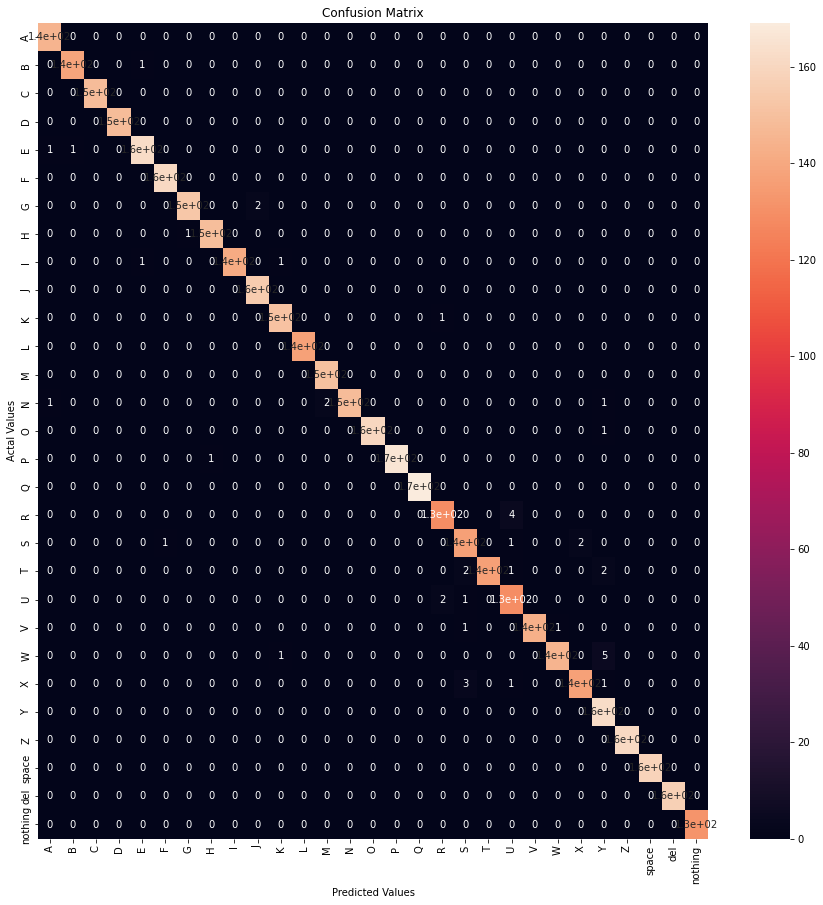

In [20]:
labels = [inv_labels_dict[i] for i in range(29)]

cm_df = pd.DataFrame(cm,
                     index = labels, 
                     columns = labels)

plt.figure(figsize=(15,15))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()